# Feature Analysis

In [2]:
import helpers as h
import numpy as np
import pandas as pd

import scipy.stats as stats

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

data = pd.read_csv("../data/creditcard.csv")
Features = ['V%d' % n for n in range(1, 29)]

In [63]:
def ttest(sample1, sample2, Features):
    """
    Returns a dictionary with representing features and values representing the p value 
    or probability that sample1 comes from the same distribution as sample2.

    Parameters
    ----------
    sample1: Pandas dataframe represting the transactions and their associated features.
    sample2: Pandas dataframe represting the transactions and their associated features.
    Features: List of column names from input dataframes that are to be evaluated.

    Returns
    -------
    Dictionary with key value pairs representing feature names and their associated p_val with same length as Features
    """
    p_dict = {}
##    p_lst = []
    for f in Features:
        stat, p_val = stats.ttest_ind(sample1[f], sample2[f], equal_var=False)  
        p_dict[f] = [p_val] 
##        p_lst.append[p_val]
##     df = pd.DataFrame(p_lst, columns=Features))
#     df = pd.DataFrame.from_dict(p_dict,orient='columns')
#     df = df2.T.reset_index()
#     df.columns = ['Feature','p_val']  
#     return df
    return p_dict

fraud_grp = data[(data['Class']==1) & (data['Amount']<=1)]
legit_grp = data[(data['Class']==0) & (data['Amount']<=1)]
ttest_dict = ttest(fraud_grp, legit_grp, Features)



df2 = pd.DataFrame.from_dict(ttest_dict,orient='columns')
df2 = df2.T.reset_index()
df2.columns = ['Feature','p_val']


grp1 = data[(data['Class']==1) & (data['Amount']>1)]
grp2 = data[(data['Class']==0) & (data['Amount']>1)]
ttest_dict = ttest(grp1, grp2, Features)

df3 = pd.DataFrame.from_dict(ttest_dict,orient='columns')
df3 = df3.T.reset_index()
df3.columns = ['Feature','p_val']


TypeError: unhashable type: 'slice'

In [64]:
# df2.sort_values('p_val', ascending=False, inplace=True)

Text(0.5, 1.0, 'p values for transactions > $1')

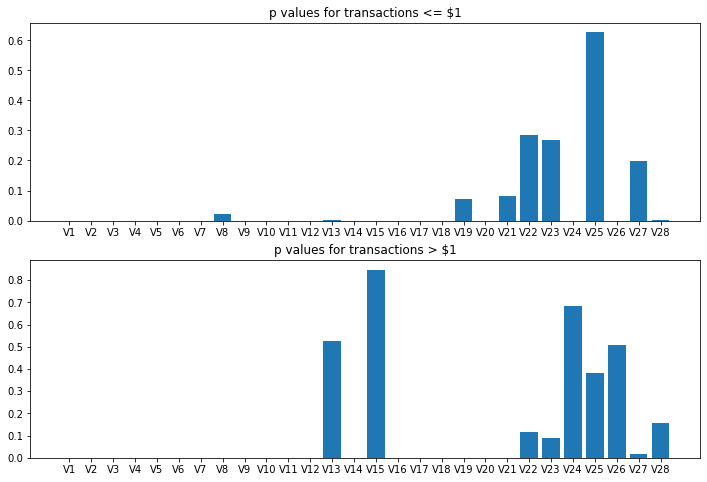

In [68]:
fig, axs = plt.subplots(2,1,figsize=(12,8))

x = df2['Feature']
y1 = df2['p_val']
y2 = df3['p_val']
axs[0].bar(x, y1)
axs[1].bar(x, y2)
axs[0].set_title('p value (fraud vs. non-fraud) for transactions <= $1')
axs[1].set_title('p value (fraud vs. non-fraud) for transactions > $1')
axs
# axs[1].set_ylim((0,0.01))

In [3]:
# a low p means you cannot reject the hypothesis that the samples are from the same distribution
    
# need to account fof bonfori correction if measuring over differences in populations (like I will be doing with 
# the subsets of fraud population or the day1 vs day2)
for f in Features:
    print(f)
    fraud_grp = data[data['Class']==1][f]
    legit_grp = data[data['Class']==0][f]
    stat, p_val = stats.ttest_ind(fraud_grp, legit_grp, equal_var=False)
    print(f'The {f} statistic is: {stat} \nP-value: {p_val}')

V1
The V1 statistic is: -15.629064609674844 
P-value: 5.491642982537676e-45
V2
The V2 statistic is: 18.761176823315797 
P-value: 1.2885797612095705e-59
V3
The V3 statistic is: -21.976004399367977 
P-value: 4.7860814074282e-75
V4
The V4 statistic is: 35.11644940739403 
P-value: 4.587316921388562e-136
V5
The V5 statistic is: -13.032118672974827 
P-value: 1.4970277071054122e-33
V6
The V6 statistic is: -16.706743494730443 
P-value: 5.880377860840174e-50
V7
The V7 statistic is: -17.168754779170776 
P-value: 4.2922313194412136e-52
V8
The V8 statistic is: 1.8651390657084321 
P-value: 0.06275811803424974
V9
The V9 statistic is: -22.928480841254068 
P-value: 1.1935046623364764e-79
V10
The V10 statistic is: -25.75526028732098 
P-value: 3.382883650613494e-93
V11
The V11 statistic is: 31.519223172648527 
P-value: 4.577212375356592e-120
V12
The V12 statistic is: -29.88002649494514 
P-value: 1.4813165028380743e-112
V13
The V13 statistic is: -2.197911819035529 
P-value: 0.028420168192532333
V14
The V

## Legitimate Transaction Sample

In [ ]:
df_stat_legit = data[Features][data['Class']==0].agg(['mean', 'median', 'std'])
df_stat_legit.head()

In [ ]:
df_stat_fraud = data[Features][data['Class']==1].agg(['mean', 'median', 'std'])
df_stat_fraud.head()

In [ ]:
df_stats_bsfraud['std'].sort_values()

## Bootstrap Fraud Sample

In [ ]:
#import scikits.bootstrap as sci
df_fraud = data[Features][data['Class']==1]
df_bootstrap_mean = pd.DataFrame(columns=df_fraud.columns)
df_bootstrap_std = pd.DataFrame(columns=df_fraud.columns)
df_bootstrap_median = pd.DataFrame(columns=df_fraud.columns)

samples = 5000
for _ in range(samples):
    bootstrap = df_fraud.sample(n=len(df_fraud), replace=True, axis=0, random_state=1111)
    df_bootstrap_mean = df_bootstrap_mean.append(bootstrap.mean(), ignore_index=True)
    df_bootstrap_std = df_bootstrap_std.append(bootstrap.std(), ignore_index=True)
    df_bootstrap_median = df_bootstrap_median.append(bootstrap.median(), ignore_index=True)
bootstrap_mean = df_bootstrap_mean.mean()

bootstrap_mean.head()
# bootstrap_std = df_bootstrap_std.mean()
# bootstrap_median = df_bootstrap_median.mean()

In [ ]:
print(df_stats_bsfraud.transpose())

In [77]:
data['Amt_round'] = data['Amount'].round()
df5 = data[data['Class']==1].groupby('Amt_round')['Amt_round'].count()
df5.columns = ['cnt']

AttributeError: 'Series' object has no attribute 'info'

<AxesSubplot:xlabel='Amt_round'>

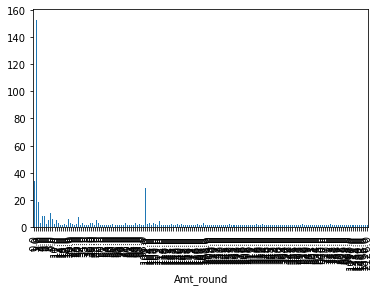

In [83]:
df5.plot.bar(x='Amt_round', y='cnt')

In [106]:
def ttest(sample1, sample2, Features):
    """
    Returns a dictionary with representing features and values representing the p value 
    or probability that sample1 comes from the same distribution as sample2.

    Parameters
    ----------
    sample1: Pandas dataframe represting the transactions and their associated features.
    sample2: Pandas dataframe represting the transactions and their associated features.
    Features: List of column names from input dataframes that are to be evaluated.

    Returns
    -------
    Dictionary with key value pairs representing feature names and their associated p_val with same length as Features
    """

#    p_dict = {}
    p_lst = []
    for f in Features:
        stat, p_val = stats.ttest_ind(sample1[f], sample2[f], equal_var=False)  
        p_dict[f] = [p_val] 
        p_lst.append(p_val)
#    df = pd.DataFrame.from_dict(p_dict,orient='columns')
    df = pd.DataFrame(p_dict,orient='columns')
    df = df.T.reset_index()
    df.columns = ['Feature','p_val']  
    return df

fraud_grp = data[(data['Class']==1) & (data['Amount']<=1)]
legit_grp = data[(data['Class']==0) & (data['Amount']<=1)]
df7 = ttest(fraud_grp, legit_grp, Features)

grp1 = data[(data['Class']==1) & (data['Amount']>1)]
grp2 = data[(data['Class']==0) & (data['Amount']>1)]
df8 = ttest(grp1, grp2, Features)


(1, 28)
(28, 2)
(1, 28)
(28, 2)


array([<AxesSubplot:title={'center':'p value (fraud vs. non-fraud) for transactions <= $1'}>,
       <AxesSubplot:title={'center':'p value (fraud vs. non-fraud) for transactions > $1'}>],
      dtype=object)

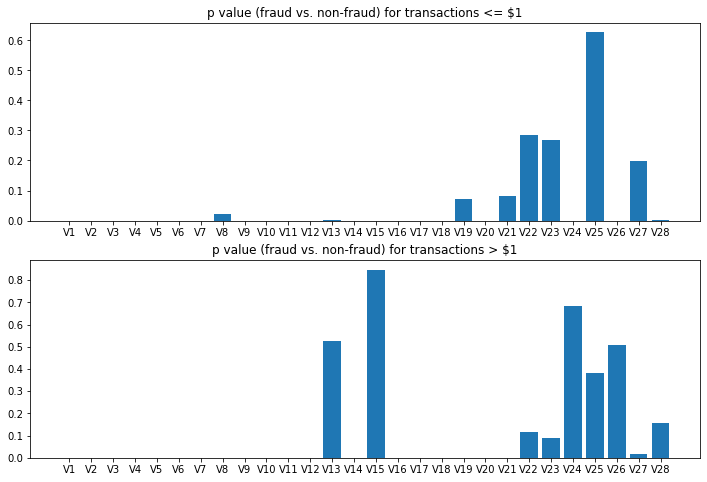

In [107]:
fig, axs = plt.subplots(2,1,figsize=(12,8))

x = df7['Feature']
y1 = df7['p_val']
y2 = df8['p_val']
axs[0].bar(x, y1)
axs[1].bar(x, y2)
axs[0].set_title('p value (fraud vs. non-fraud) for transactions <= $1')
axs[1].set_title('p value (fraud vs. non-fraud) for transactions > $1')
axs